In [1]:
## Visualize Gene Expression Kinetics over real time for time course data
## Demonstrate on Christoph’s Mesenchymal high resolution Object

import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import ma_codes as codes
from ma_codes import mymap, mysize

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

Running Scanpy 1.5.2.dev5+ge5d246aa, on 2020-06-03 14:12.


In [2]:
## Set global plotting parameters
sc.set_figure_params(vector_friendly = True)
plt.rcParams["figure.figsize"] = (6, 5)
sb.set_style("ticks")

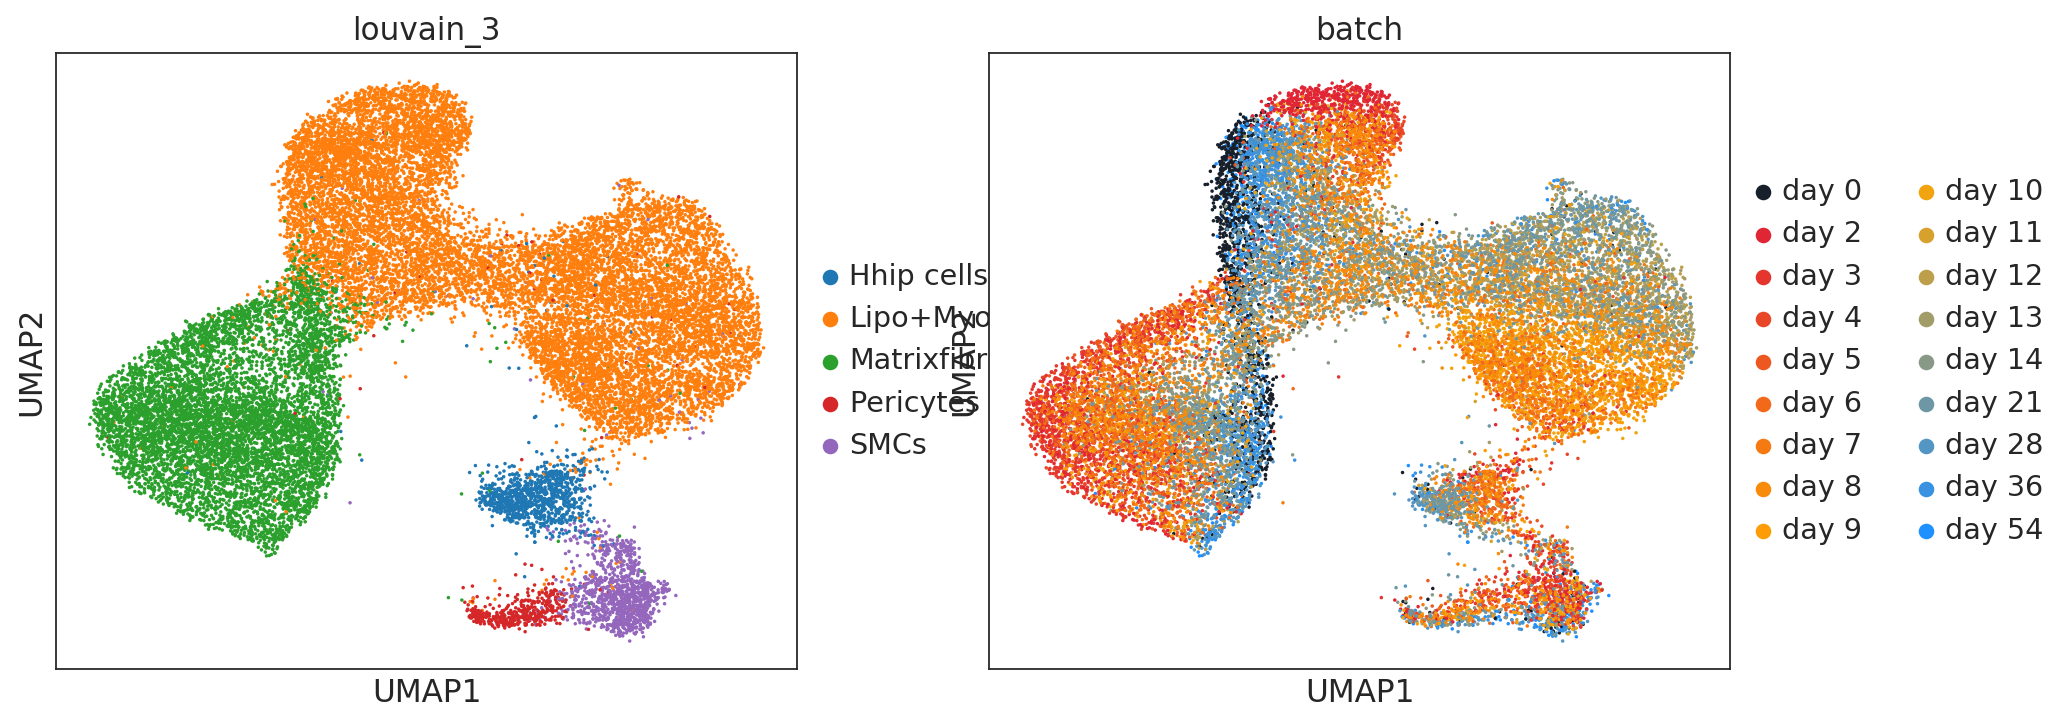

In [4]:
## Use Mesenchyme Object for this
folder = "/media/agando/578222DA06535F39/Projects/190506_Mesenchyme/"
adata = sc.read(folder + "Fibroblasts_subset_4.h5ad")
sc.pl.umap(adata, color = ["louvain_3", "batch"], size = 10)

### Gene Expression Lineplot Preparation
For lineplots, you need a continuous (not categorical) annotation on the x-axis, so we have to introduce a _numeric day_ column manually

In [6]:
xlabel = "batch"                            ## in which column the time info is stored
order = adata.obs[xlabel].cat.categories
print(order)
adata.obs["days"] = [list(order).index(i) for i in adata.obs[xlabel]]

Index(['day 0', 'day 2', 'day 3', 'day 4', 'day 5', 'day 6', 'day 7', 'day 8',
       'day 9', 'day 10', 'day 11', 'day 12', 'day 13', 'day 14', 'day 21',
       'day 28', 'day 36', 'day 54'],
      dtype='object')


In [ ]:
## If the default ordering is not the way you want to have it plotted on the x Axis
## you can set it manually by

# order = ['Uninfected', '3d', '6d', '15d', '28d', '45d', '100d']
# adata.obs["days"] = [list(order).index(i) for i in adata.obs[xlabel]]

### Gene Expression Kinetics for a given list of cluster

In [74]:
xlabel = "days"                             ## in which column the numeric time info is stored
cluster = ["Lipo+Myo", "Hhip cells"]        ## Specify here the clusters of interest (will be combined)
cluster_label = "louvain_3"                 ## where cluster information is stored

genExp = codes.generate_expr_table(adata, cluster = cluster, xlabel = xlabel, typ = cluster_label)

### smooth

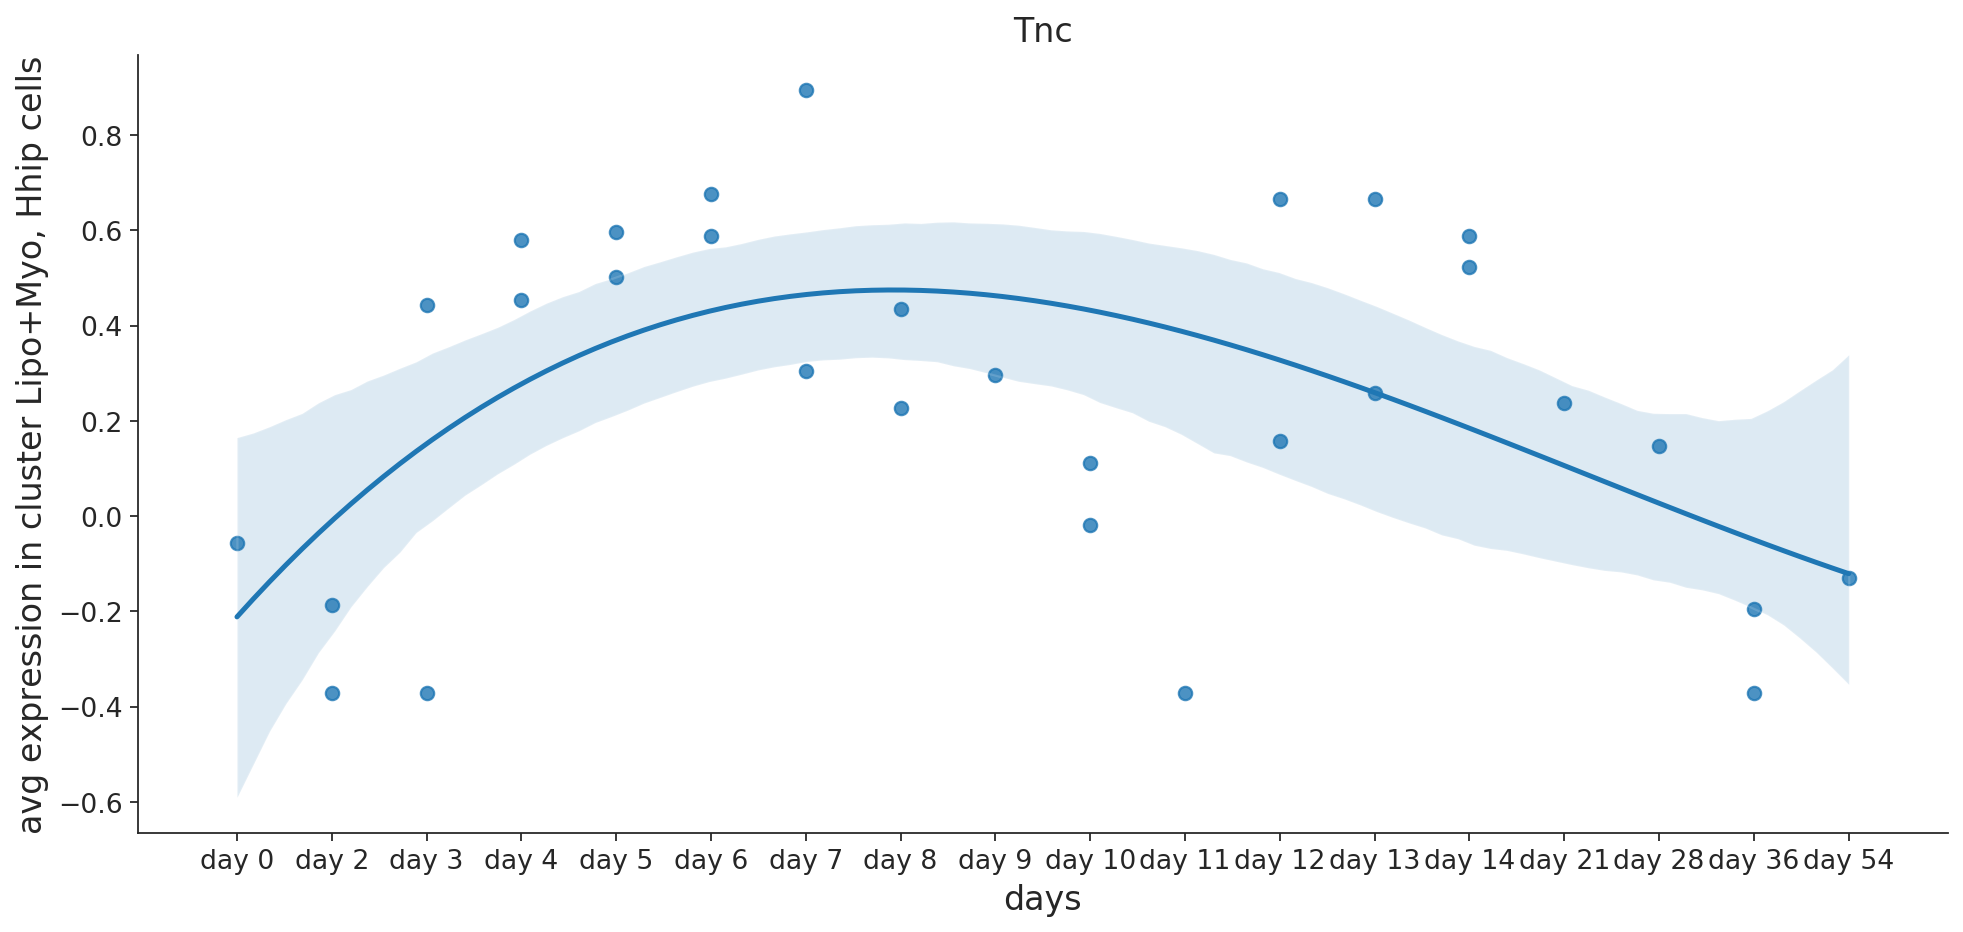

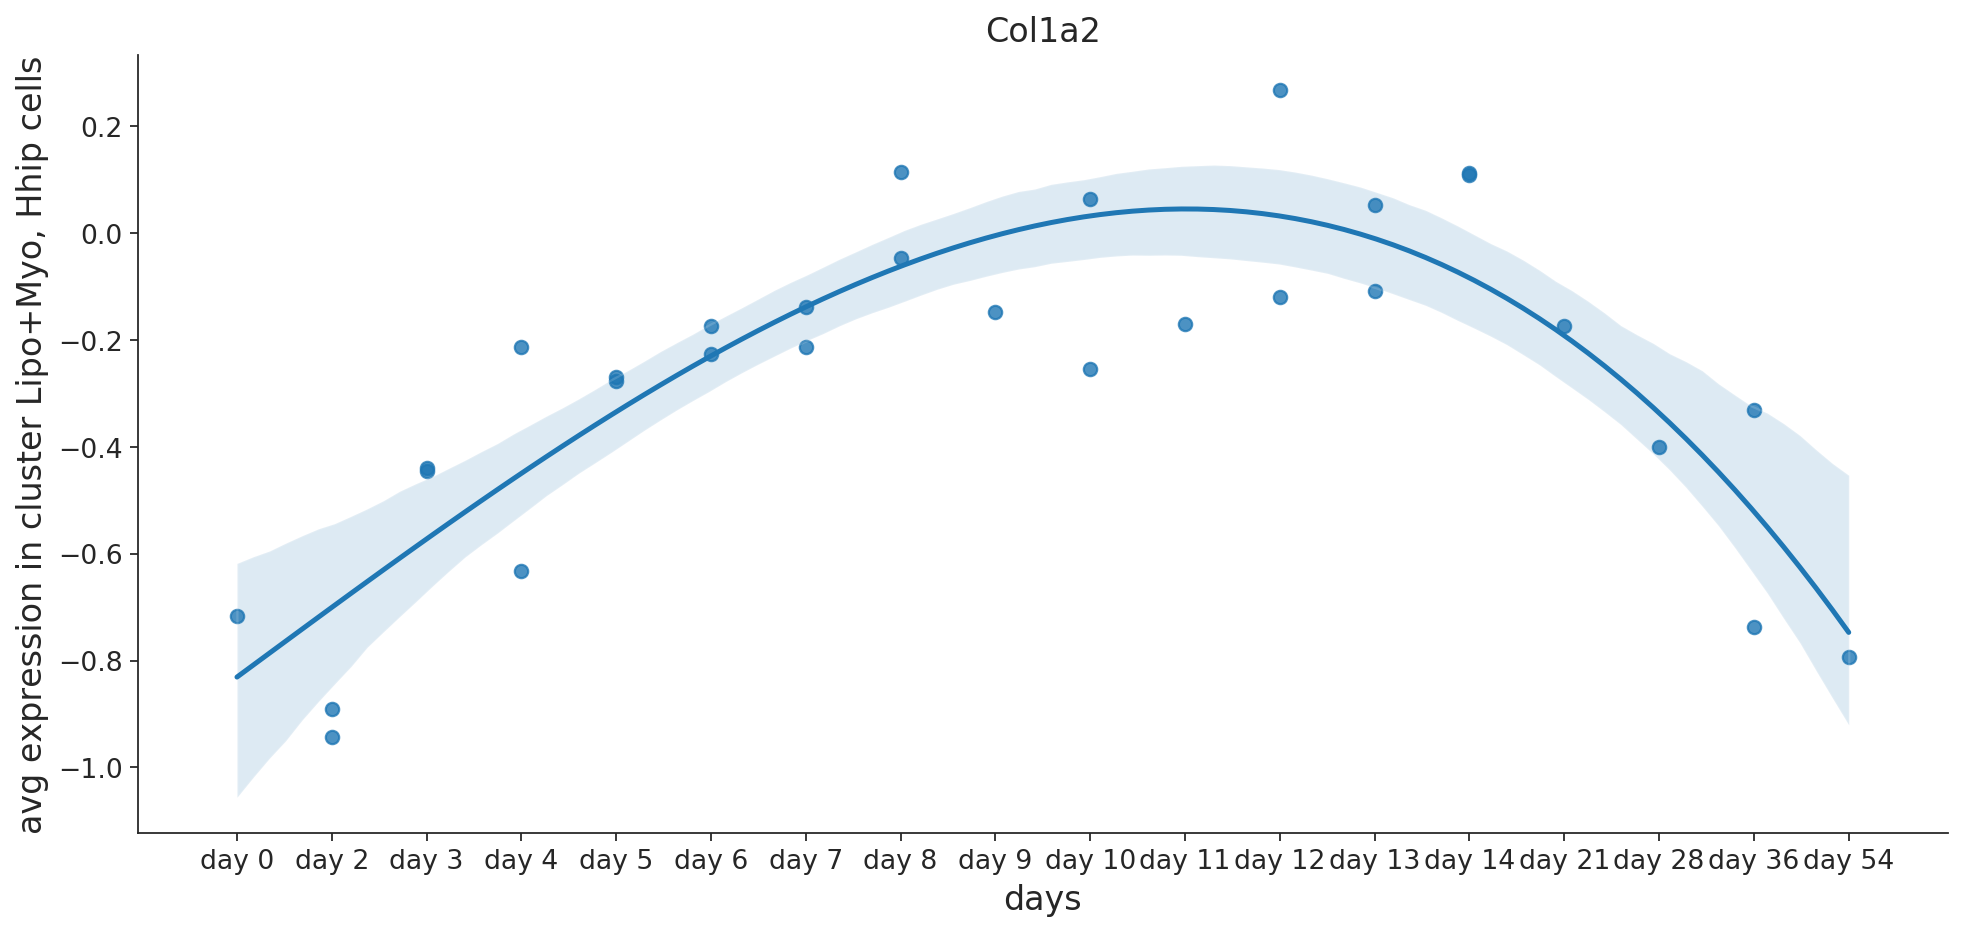

In [19]:
genes = ["Tnc", "Col1a2"]
codes.plot_avg_expression(genExp, genes, order, xlabel = xlabel, cluster = cluster, smooth = True, scatter = True,
                          figsize = (15, 6), rotation = None, save = None, conf_int = 90, order_smooth = 3)

### non-smooth

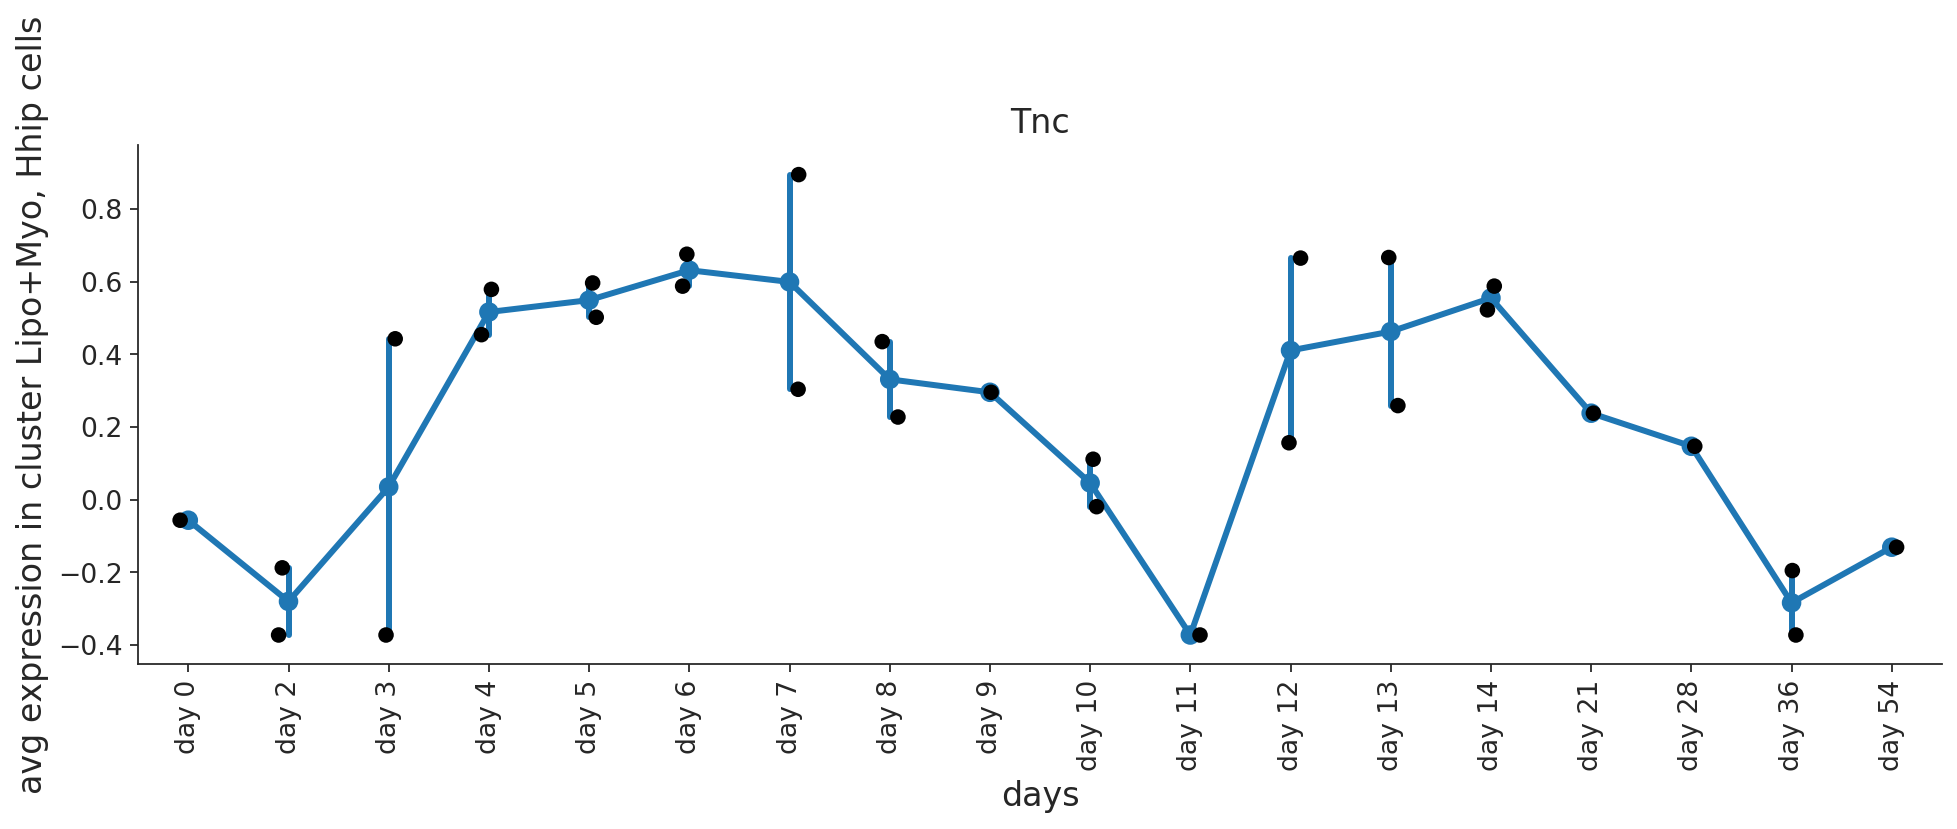

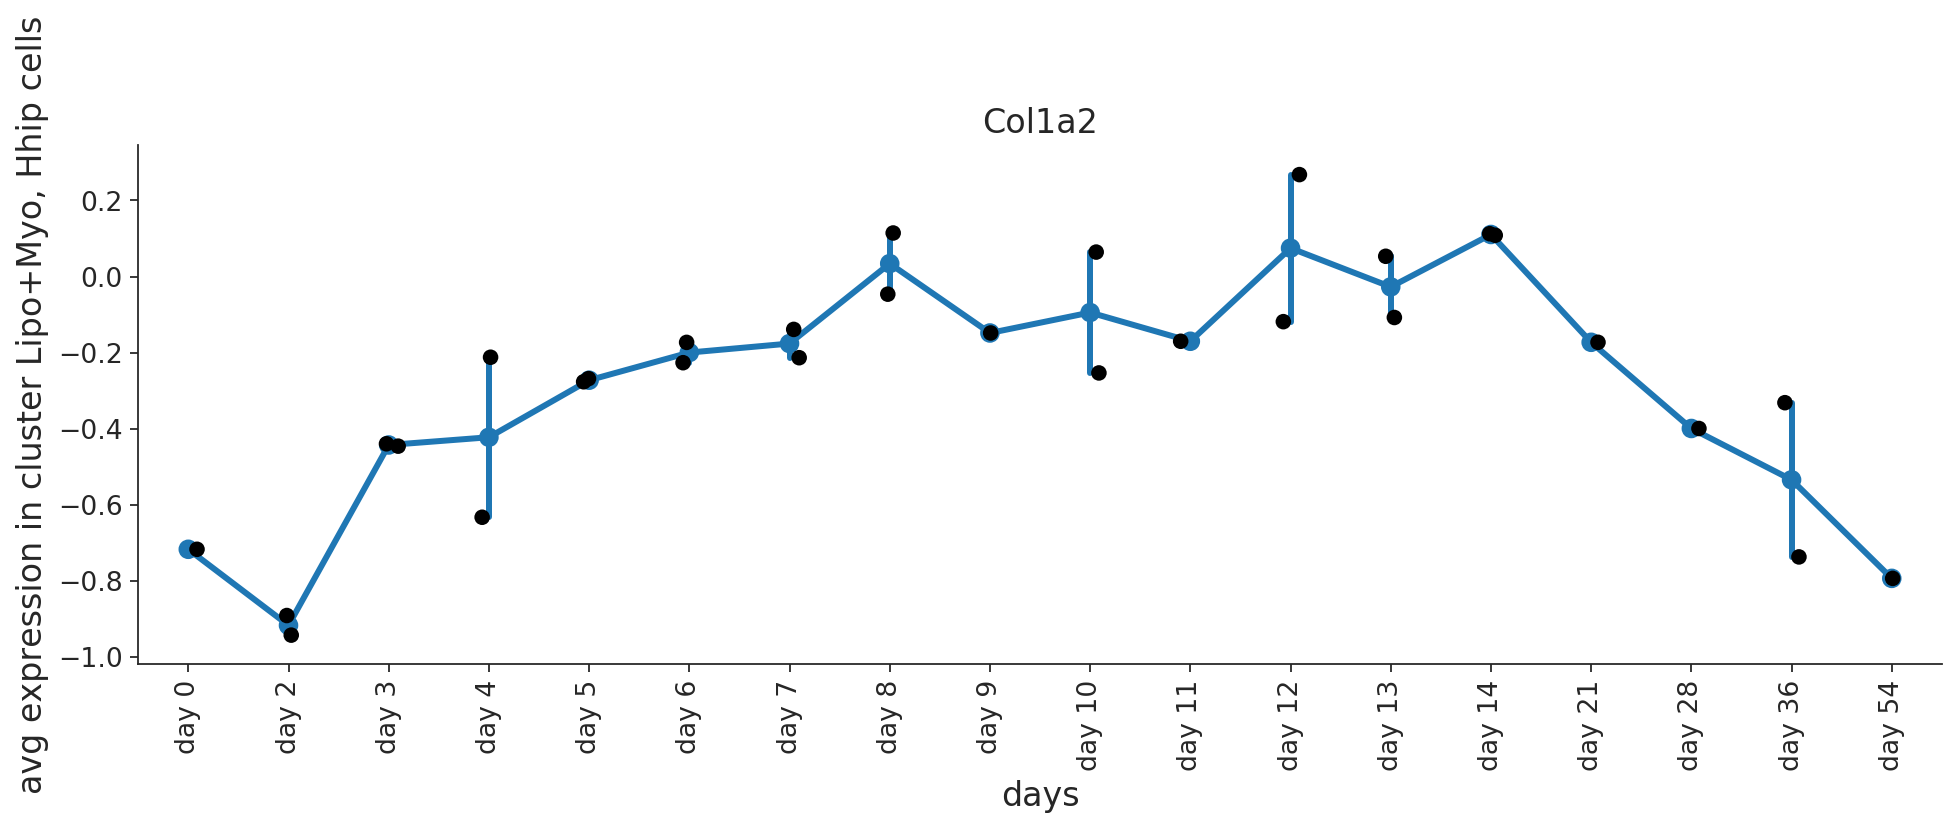

In [75]:
genes = ["Tnc", "Col1a2"]
codes.plot_avg_expression(genExp, genes, order, xlabel = xlabel, cluster = cluster, smooth = False,
                          scatter = True, figsize = (15, 4), rotation = True, save = None)

### Gene Expression Kinetics for multiple Clusters at once

In [33]:
xlabel = "days"                             ## in which column the numeric time info is stored
cluster = "all"                             ## set to all if you want to see all cluster not just a subset
cluster_label = "louvain_3"                 ## where cluster information is stored

genExp = codes.generate_expr_table(adata, cluster = cluster, xlabel = xlabel, typ = cluster_label)

### smooth

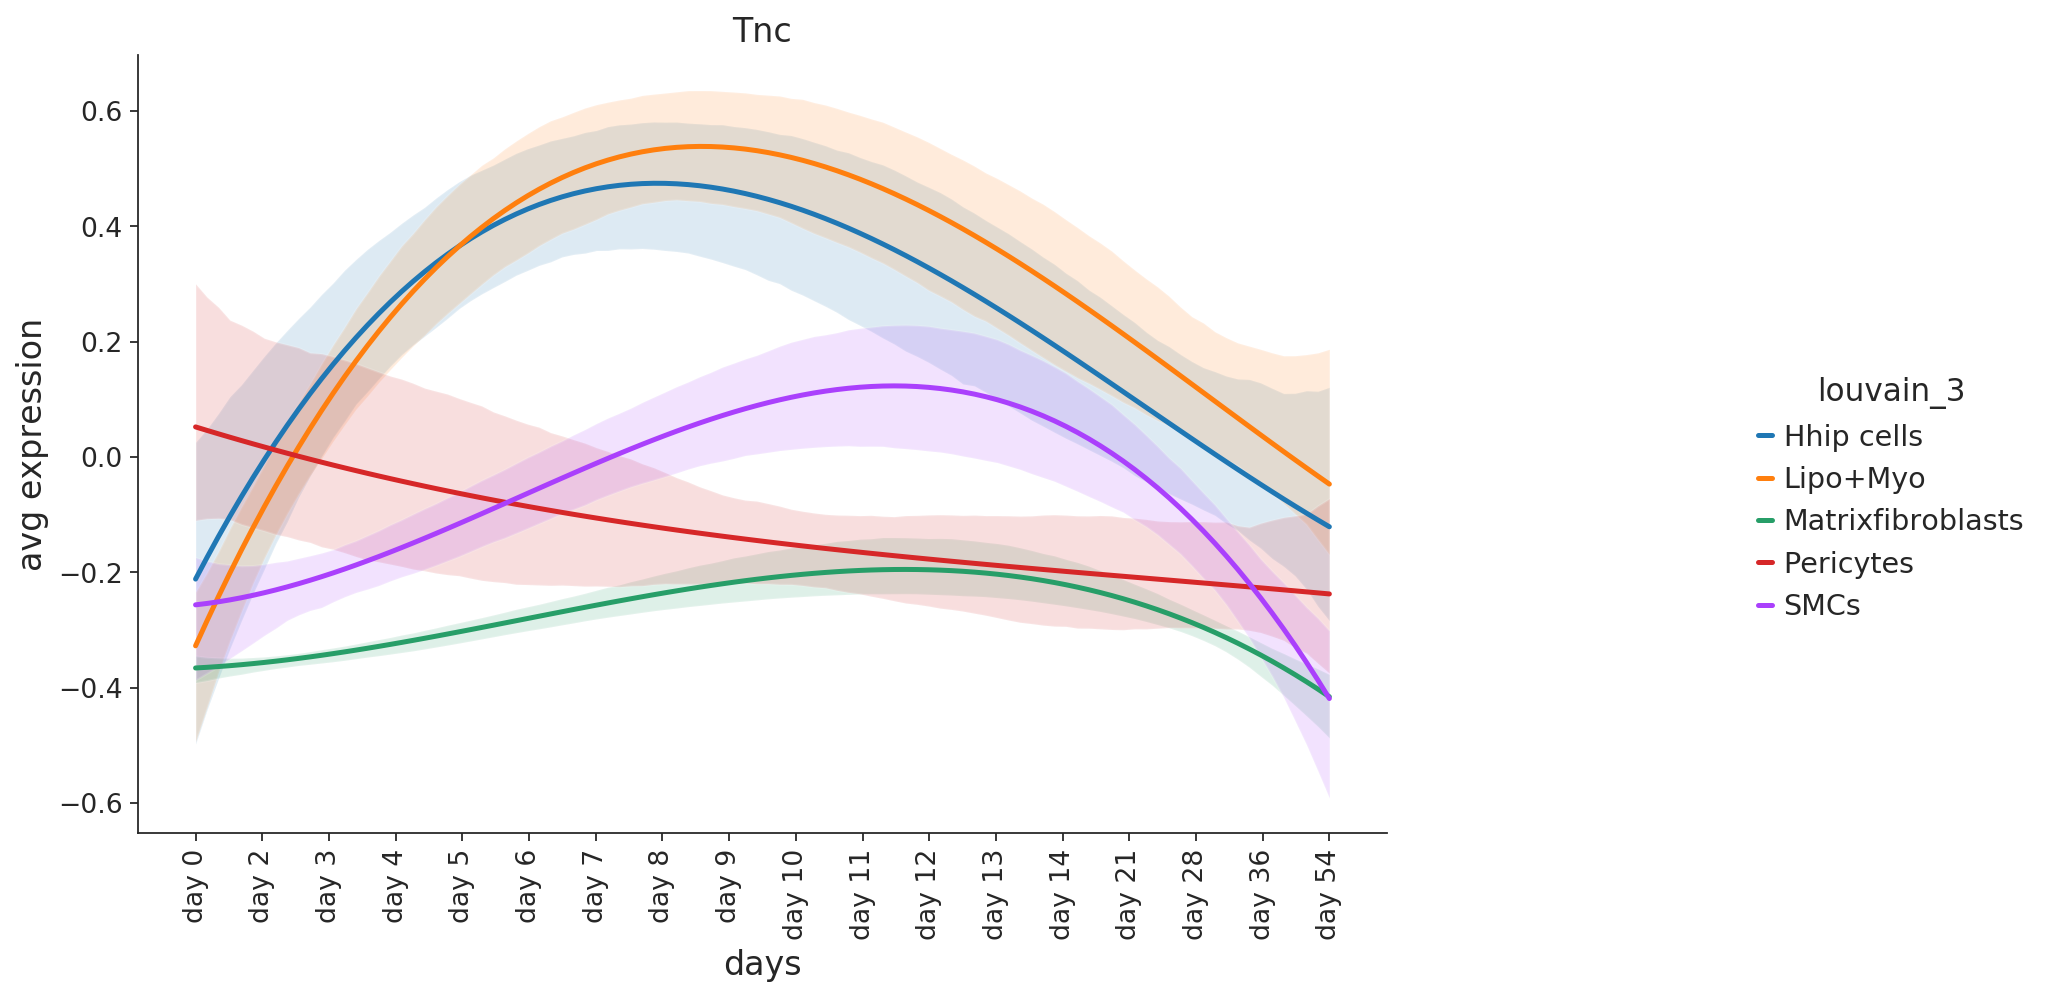

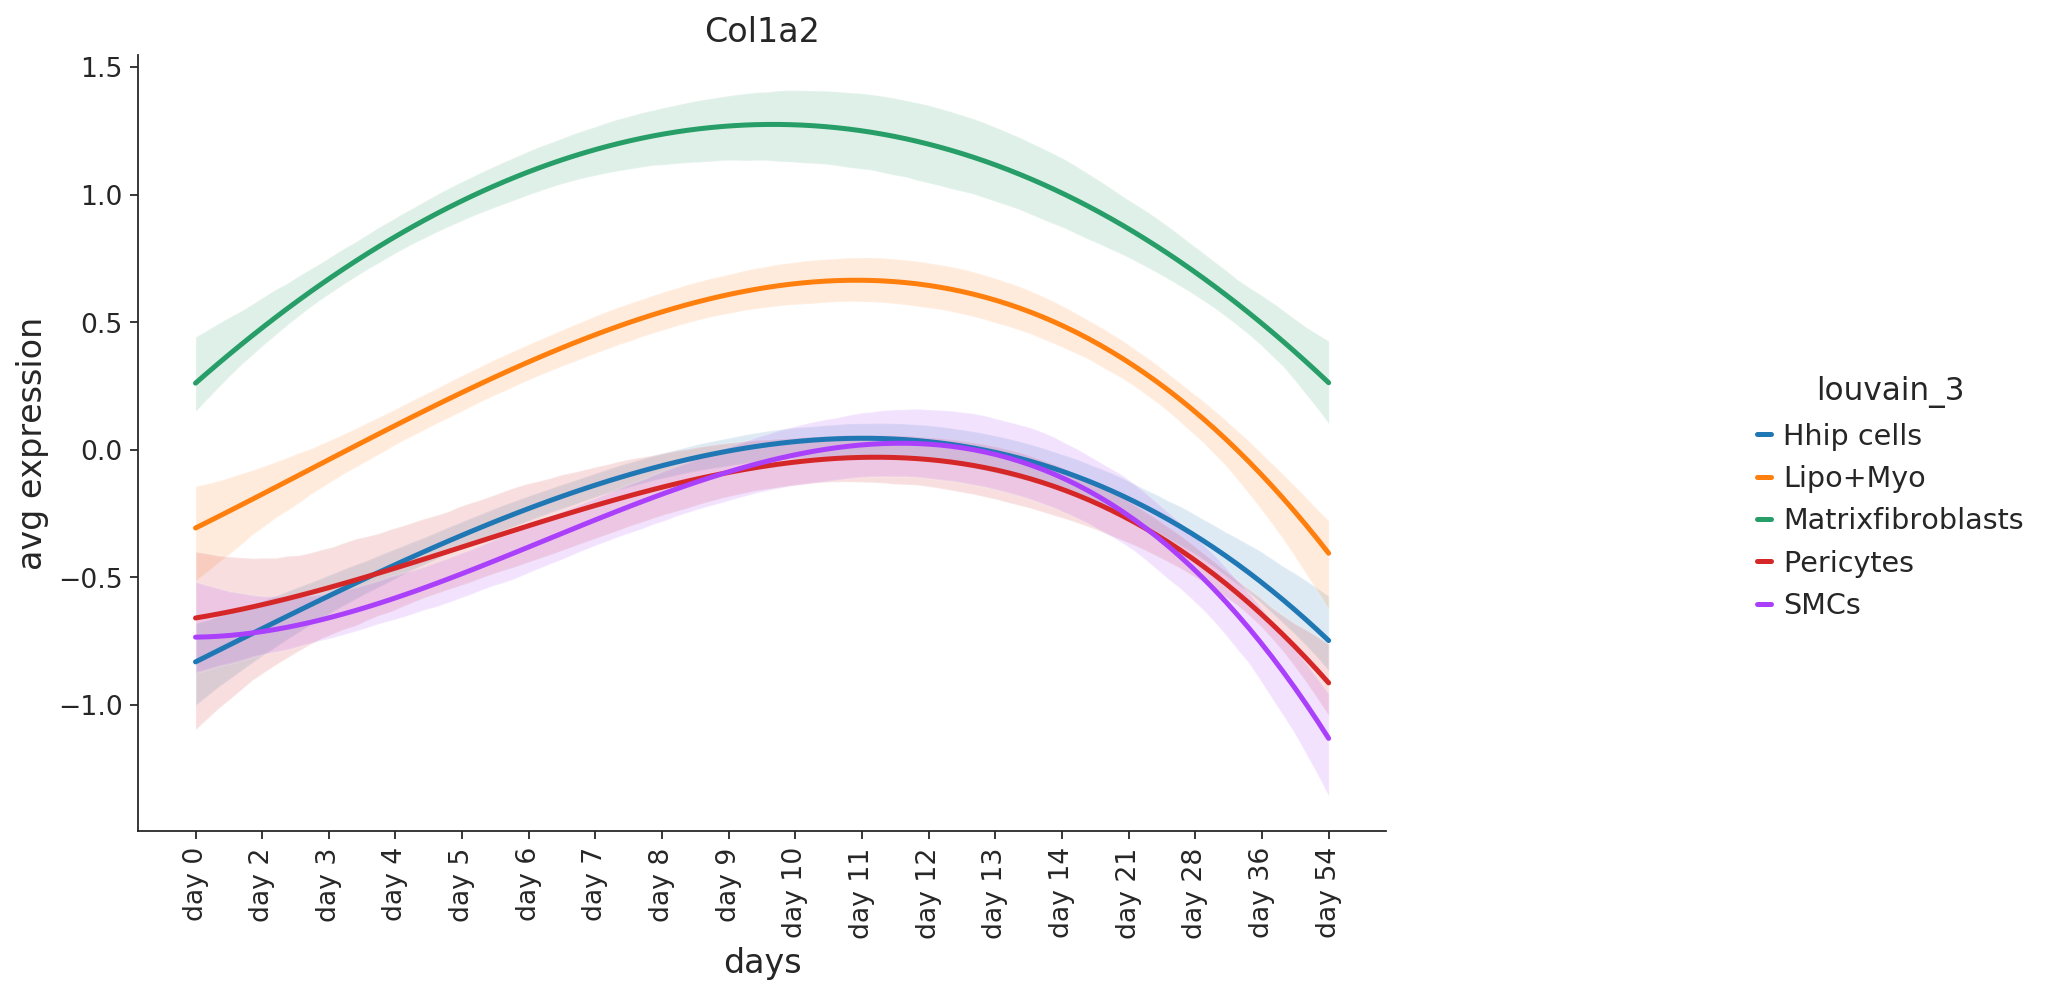

In [34]:
genes = ["Tnc", "Col1a2"]
codes.plot_avg_expression_splitCluster(genExp, genes, order, xlabel = xlabel, typ = cluster_label, smooth = True, 
                                       scatter = False, figsize = (15, 6), rotation = True, 
                                       save = None, conf_int = 80, order_smooth = 3)

### non-smooth

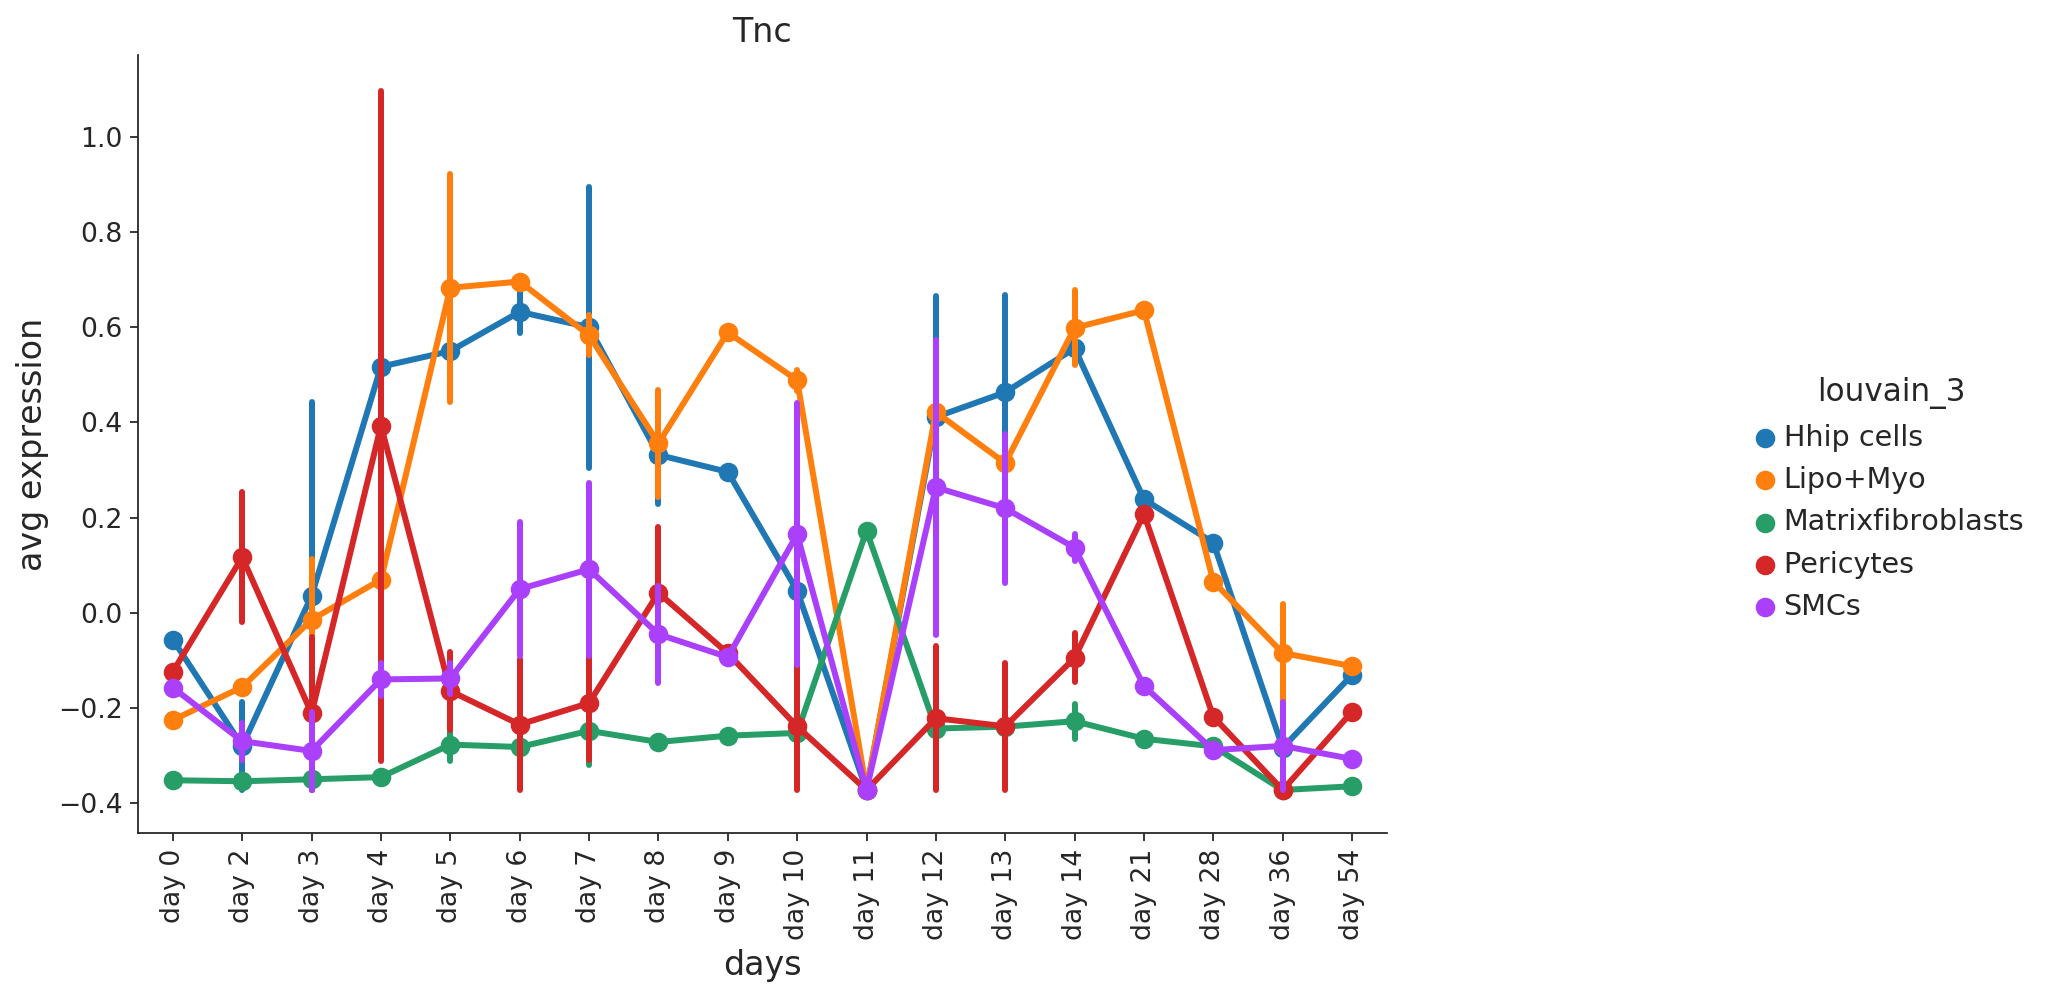

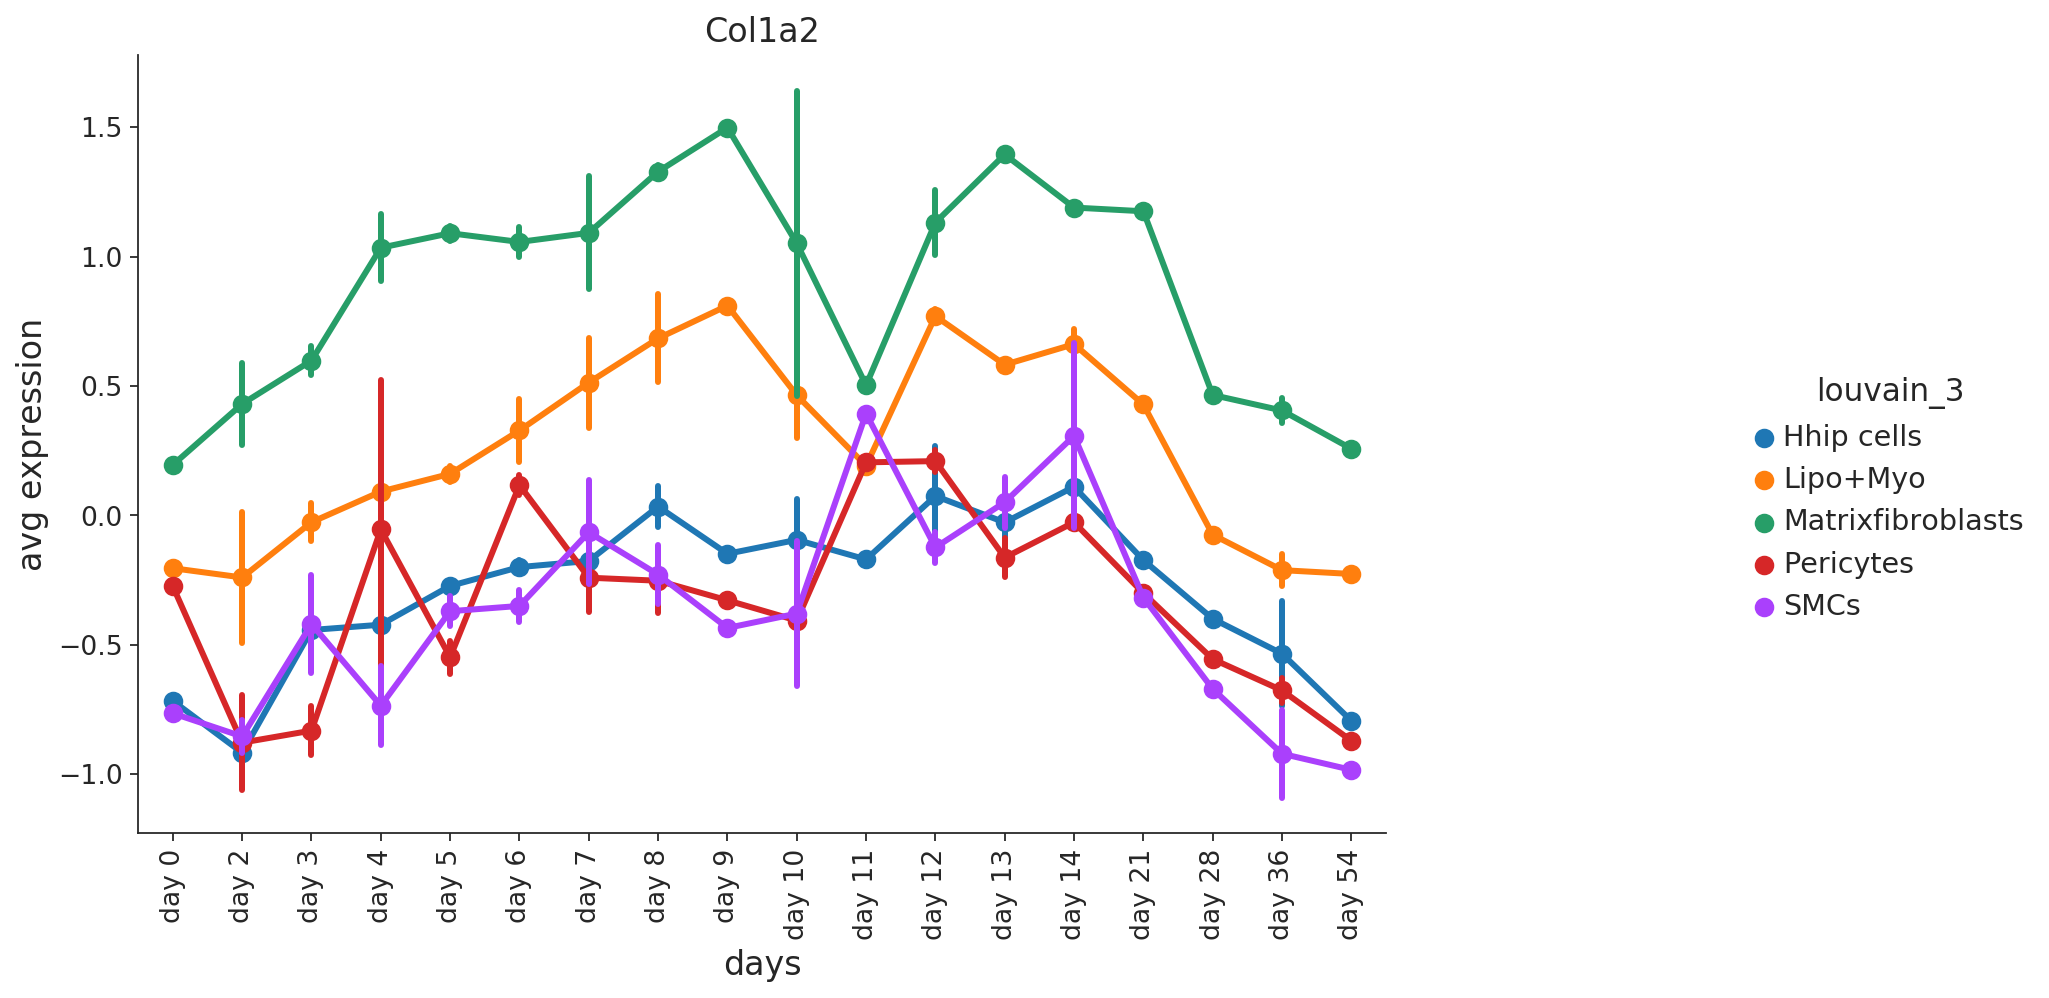

In [35]:
genes = ["Tnc", "Col1a2"]
codes.plot_avg_expression_splitCluster(genExp, genes, order, xlabel = xlabel, typ = cluster_label, smooth = False, 
                                       scatter = False, figsize = (15, 6), rotation = True, save = None)

### Gene Expression Kinetics split by condition (e.g. WT vs KO)

In [64]:
## make artificial condition column for this data set
import re
adata.obs["geno_type"] = [re.findall("M[\d]*", g)[0] for g in adata.obs.grouping]
adata.obs.geno_type.replace("M", "M1", inplace = True)
sc._utils.sanitize_anndata(adata)
adata.obs.geno_type.cat.categories

... storing 'geno_type' as categorical


Index(['M1', 'M2'], dtype='object')

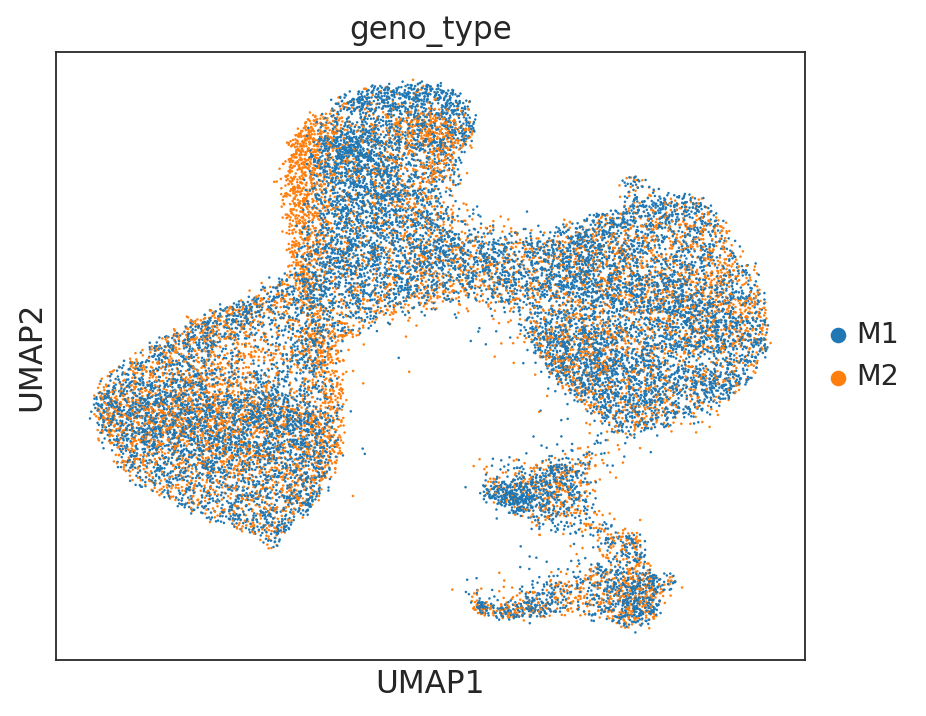

In [65]:
sc.pl.umap(adata, color = "geno_type")

In [66]:
xlabel = "days"                             ## in which column the numeric time info is stored
cluster = ["Lipo+Myo", "Hhip cells"]        ## Specify here the clusters of interest (will be combined)
cluster_label = "louvain_3"                 ## where cluster information is stored
condition = "geno_type"

genExp = codes.generate_expr_table(adata, cluster = cluster, xlabel = xlabel,
                                   typ = condition)

### smooth

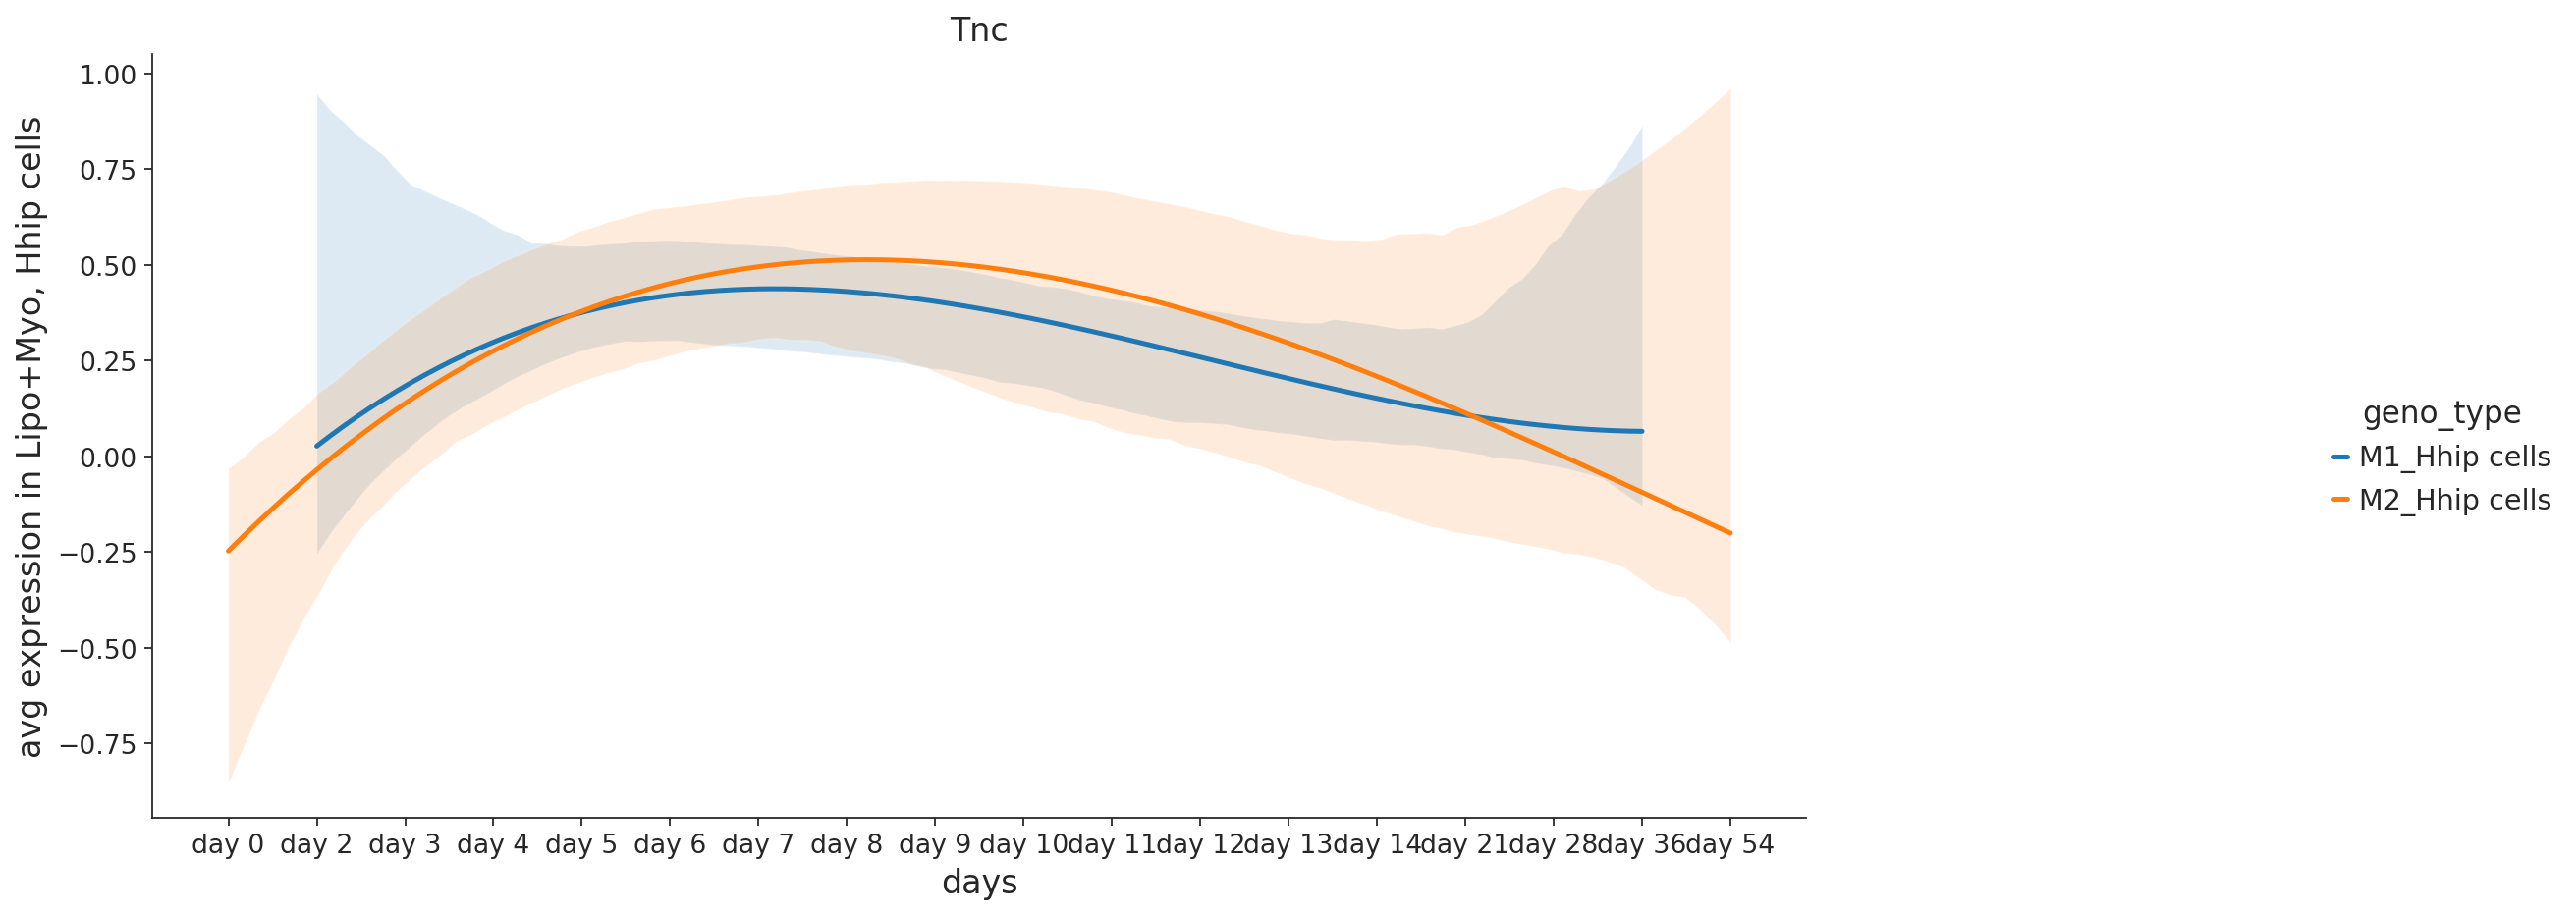

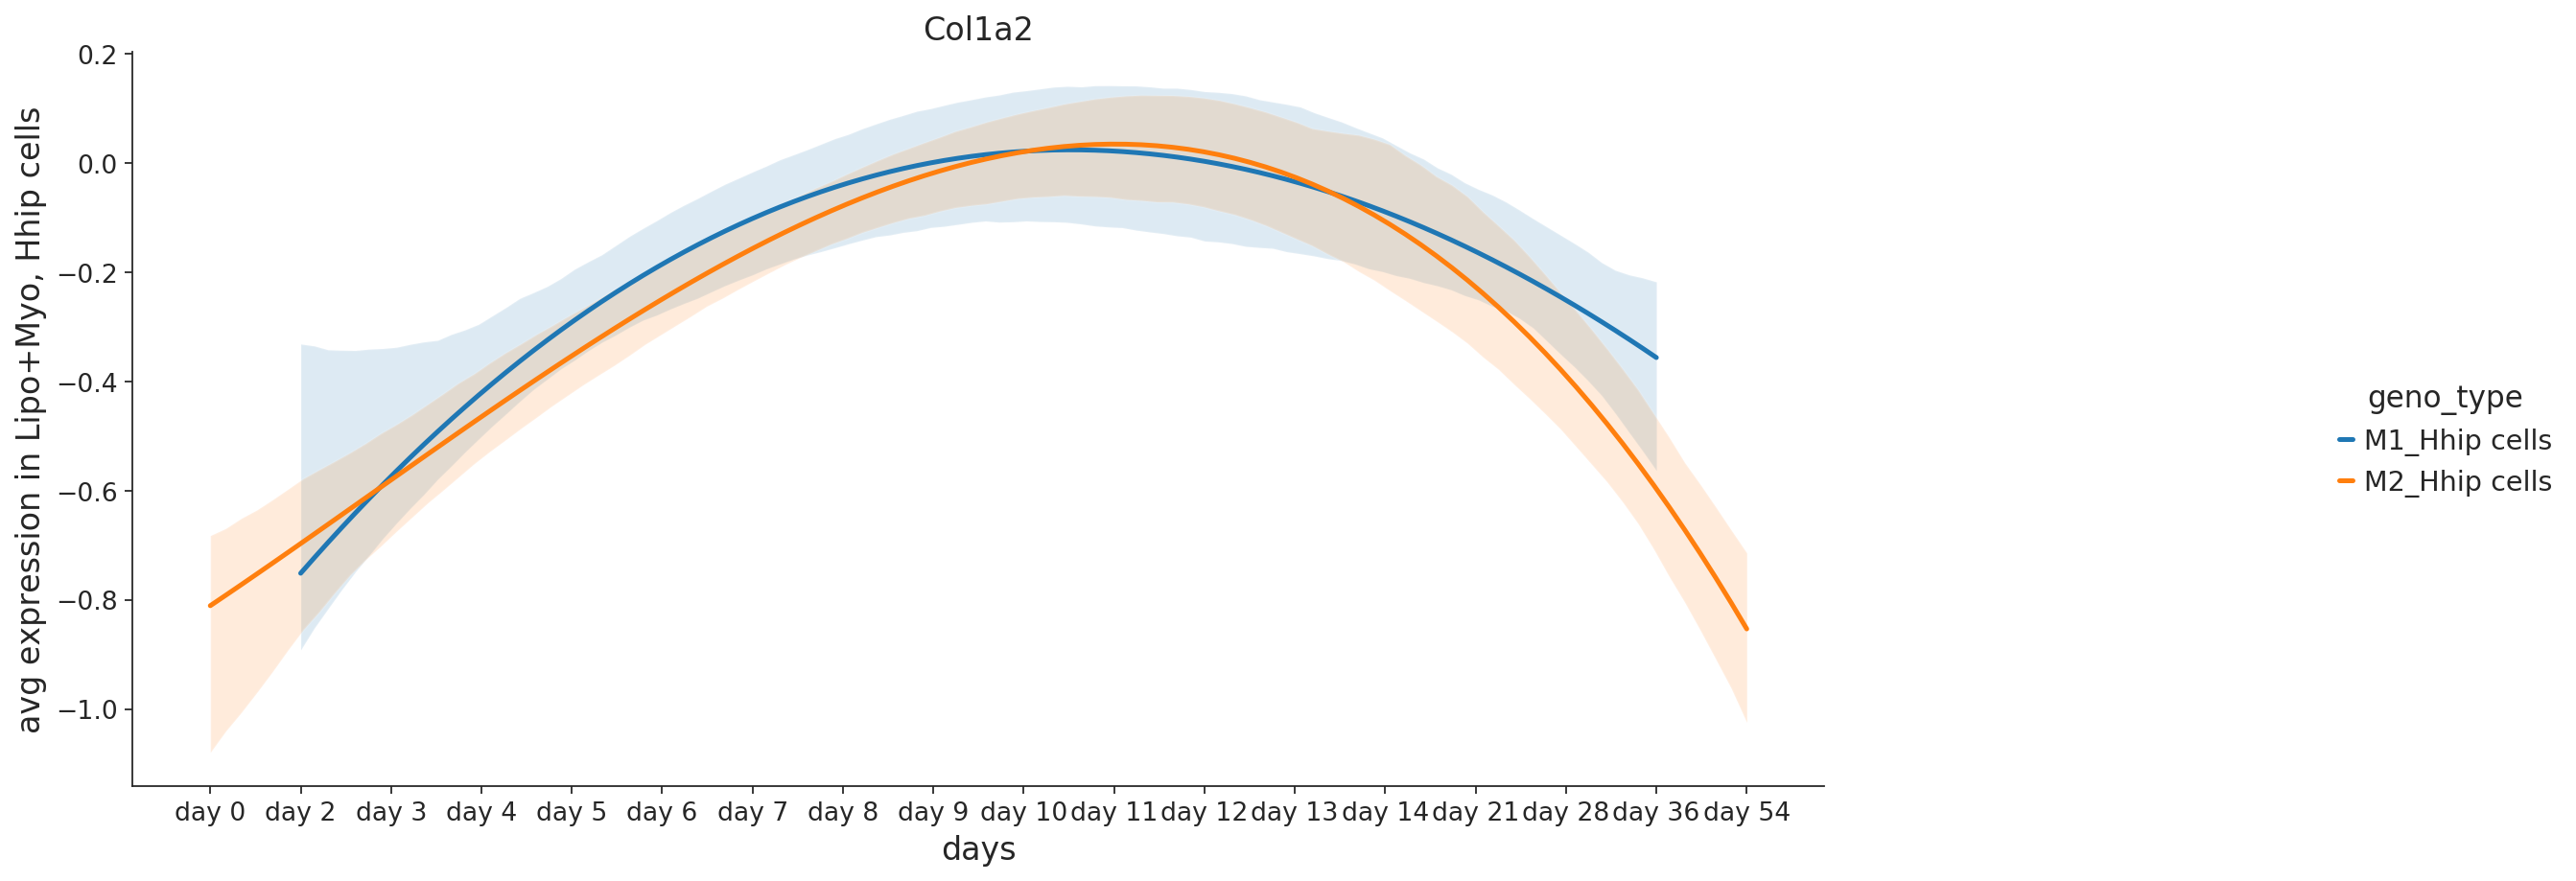

In [70]:
genes = ["Tnc", "Col1a2"]
codes.plot_avg_expression_splitCluster(genExp, genes, order, xlabel = xlabel, typ = condition, smooth = True, 
                                       scatter = False, figsize = (20, 6), rotation = False, 
                                       save = None, conf_int = 80, order_smooth = 3, cluster = cluster)

### Save Plot

Saving figure to /home/agando/Documents/GitHub/Code_Repository/Python/plots/Mesenchyme_pseudo_gt_Tnc.pdf


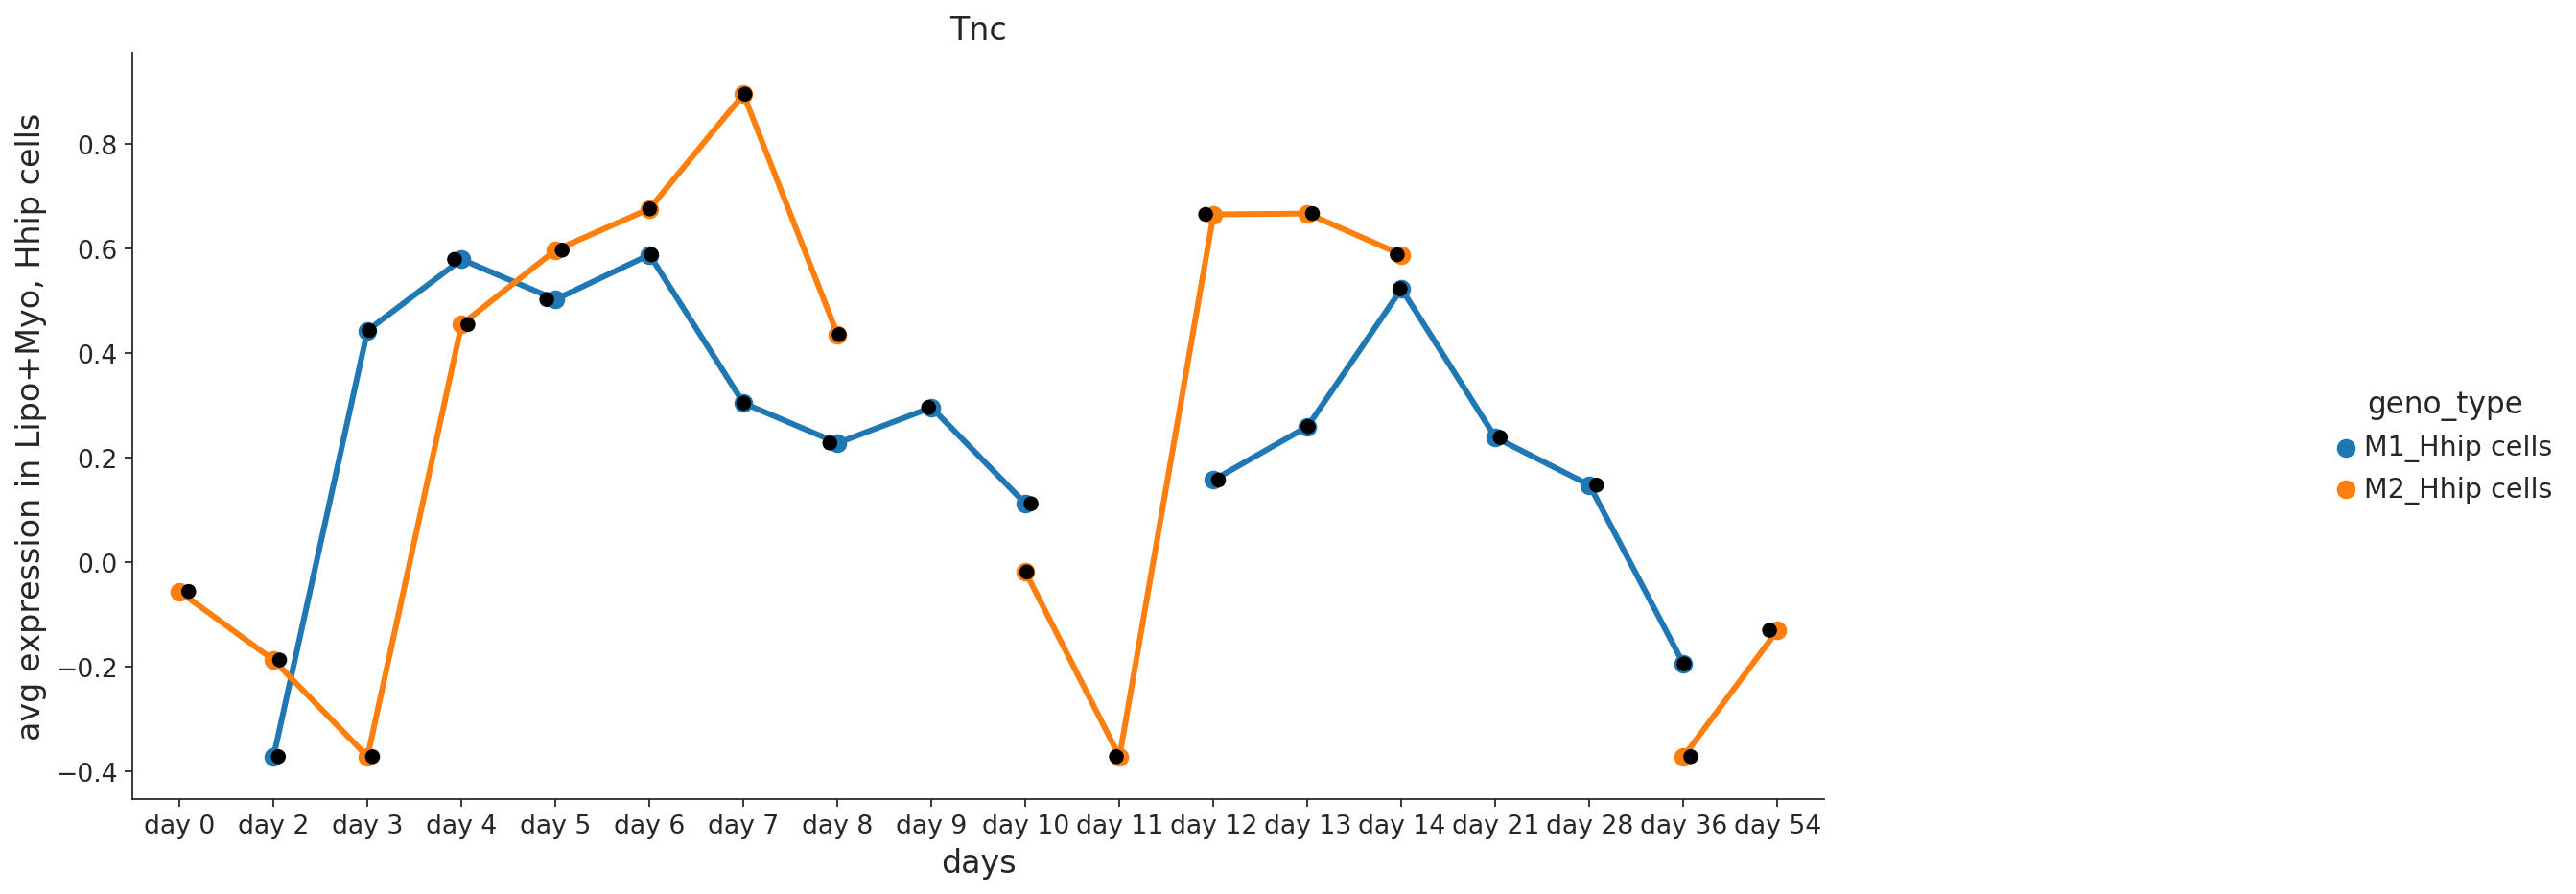

In [73]:
## To save plot, specify plot_folder and filename
plot_folder = "/home/agando/Documents/GitHub/Code_Repository/Python/plots/"

gene = "Tnc"
codes.plot_avg_expression_splitCluster(genExp, [gene], order, xlabel = xlabel, typ = condition, smooth = False, 
                                       scatter = True, figsize = (20, 6), rotation = False, cluster = cluster,
                                       save = plot_folder + "Mesenchyme_pseudo_gt_%s.pdf" %gene)